# Lab | Cleaning numerical data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
customer_df = pd.read_csv('./files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [6]:
customer_df.shape

(9134, 24)

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [19]:
# PE8 COLUMNS


col = list(customer_df.columns)

def PE8 (x):
       return x.lower().replace(' ', '_')

col_new = list(map(PE8, col))
customer_df.columns = col_new

In [22]:
# Date to datetime

customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [41]:

# Define a function that differentiates between continuous and discrete variables


In [39]:
customer_df['income'].value_counts(dropna= False) # -> unique = 5694. Since it is not categorical i will treat it as continuous
customer_df['customer_lifetime_value'].value_counts(dropna= False) # unique = 8041 --> continuous
customer_df['monthly_premium_auto'].value_counts(dropna= False) # -> unique = 202 --> discrete
customer_df['total_claim_amount'].value_counts(dropna = False) # -> len = 5106 --> continuous



0        2317
95697      12
27972       7
25370       7
61108       7
         ... 
36529       1
25859       1
38179       1
70190       1
21941       1
Name: income, Length: 5694, dtype: int64

In [57]:
def con_dis (df): 
    
    ''' 
    Function checks if variable is discrete or continouse based on the amount of unique values. 
    It returns 2 dataframes one which stores all the continouse variables and one the stores all the discrete variables.     
    The column customer is excluded because it is neither discrete nor continouse but nominal.     
    This function is only applicable for this specific df.     
    '''
    
    discr = []
    contin = []
    
    for i in df:
        if len(df[i].unique()) < 5000 and not i == 'customer': 
            discr.append(i)
        elif i != 'customer': 
            contin.append(i)
    
    continuous_df = df[contin]
    discrete_df = df[discr]
    
    return continuous_df, discrete_df


    
continuous_df,discrete_df =  con_dis(customer_df)   

display(continuous_df.head())
display(discrete_df.head())

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879


,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


<AxesSubplot:>

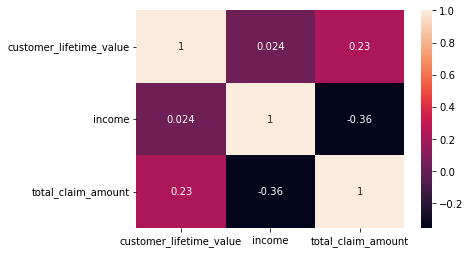

In [66]:
# Correlation Matrix

corr = continuous_df.corr()
corr_dis = discrete_df.corr()
sns.heatmap(corr, annot = True)

# --> There is no correlation between any of the continuous variables

<AxesSubplot:>

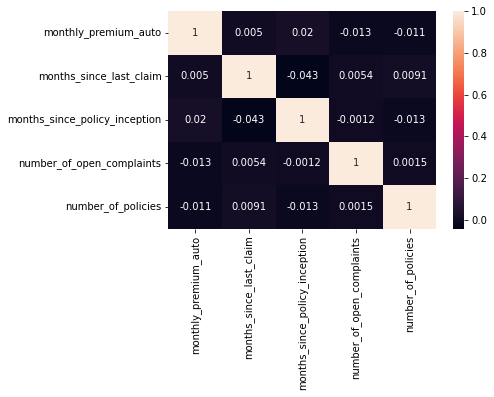

In [67]:
sns.heatmap(corr_dis, annot = True)

# --> There is no correlation between any of the discrete variables

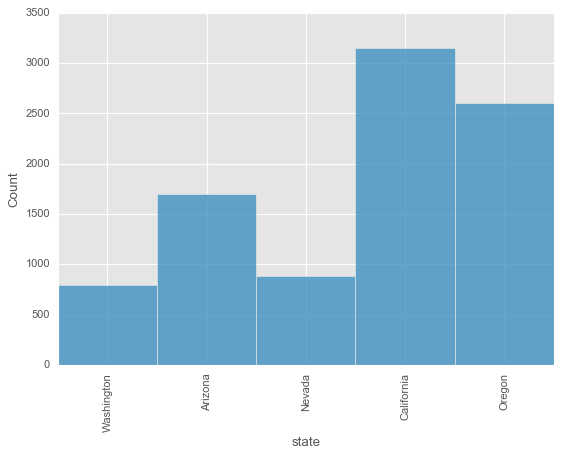

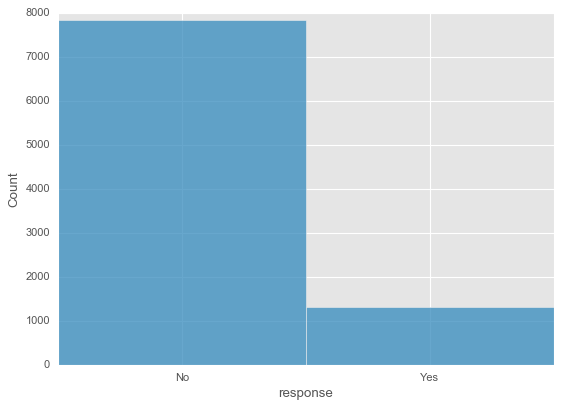

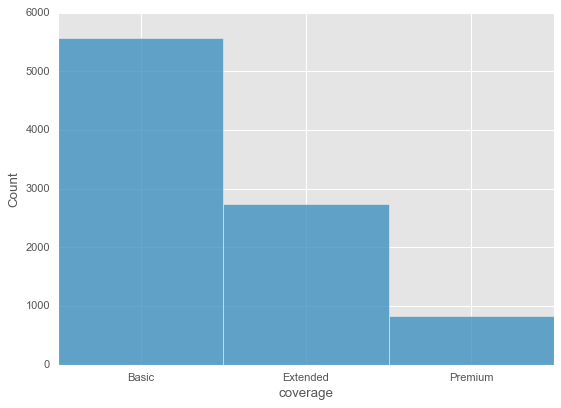

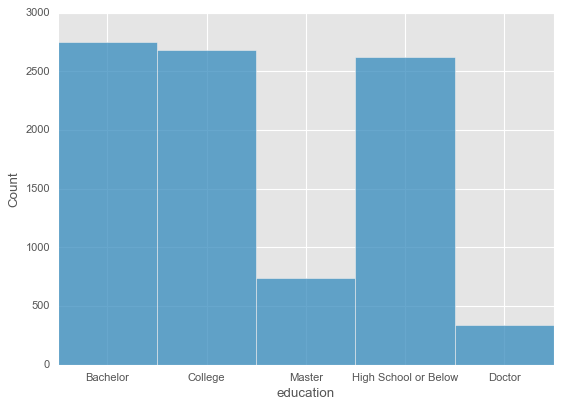

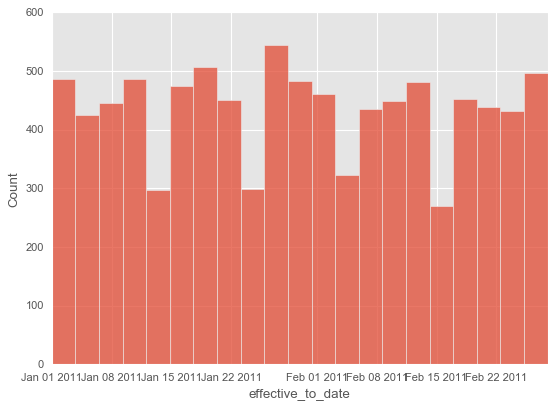

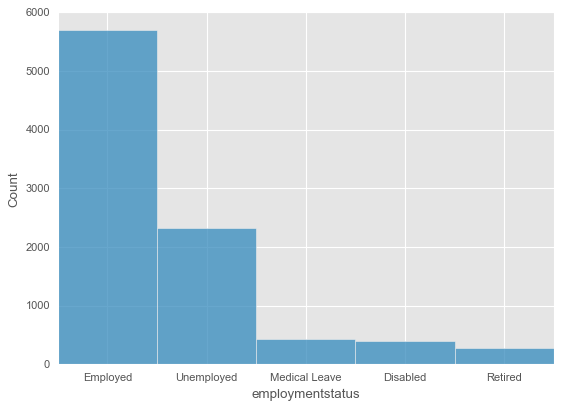

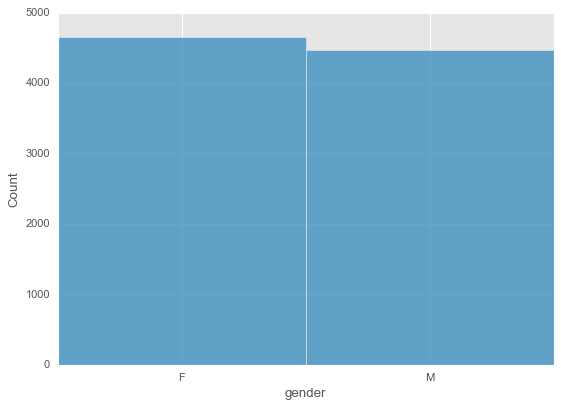

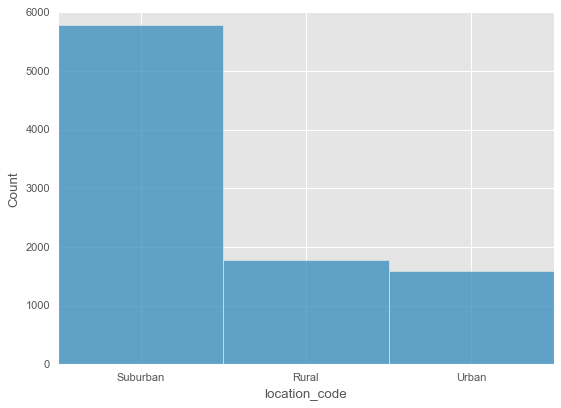

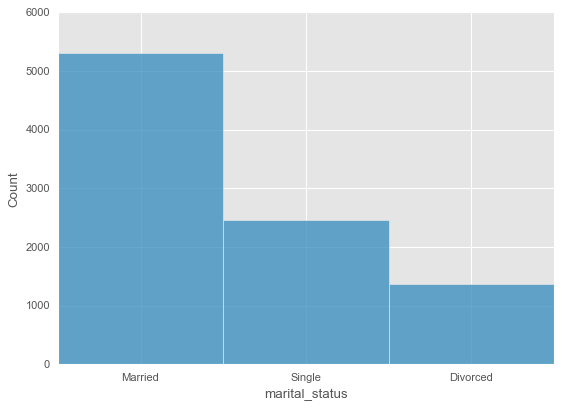

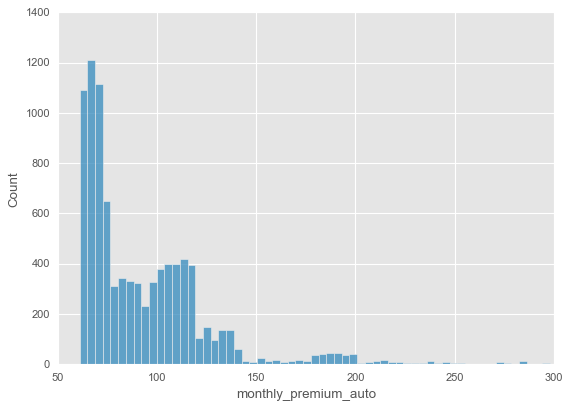

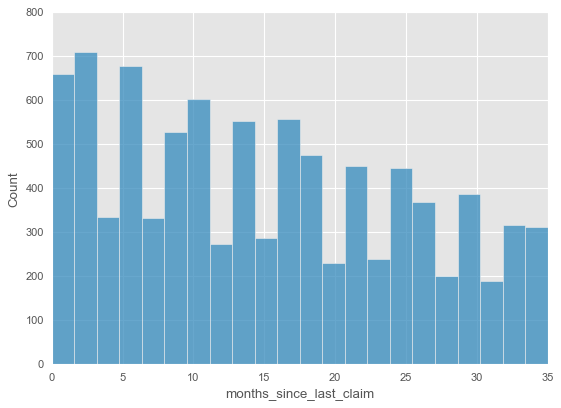

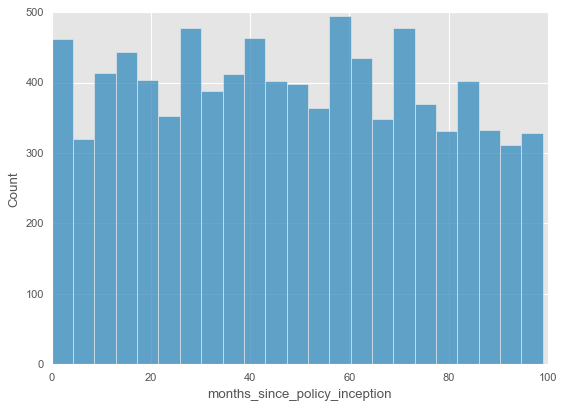

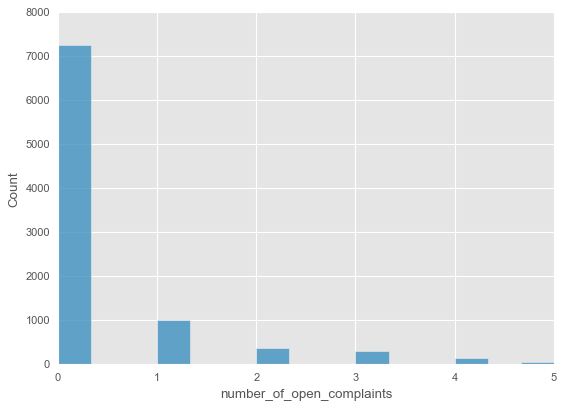

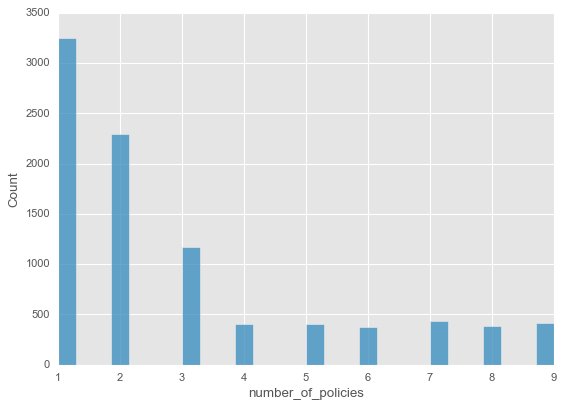

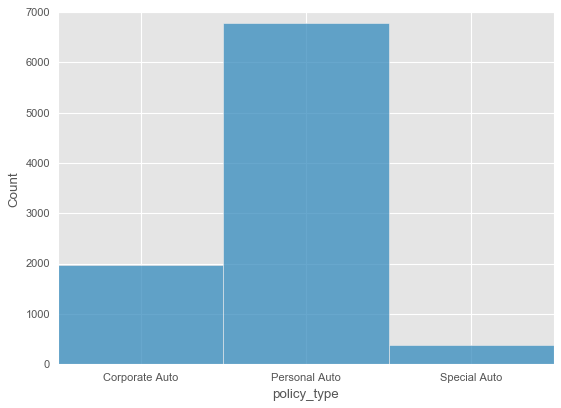

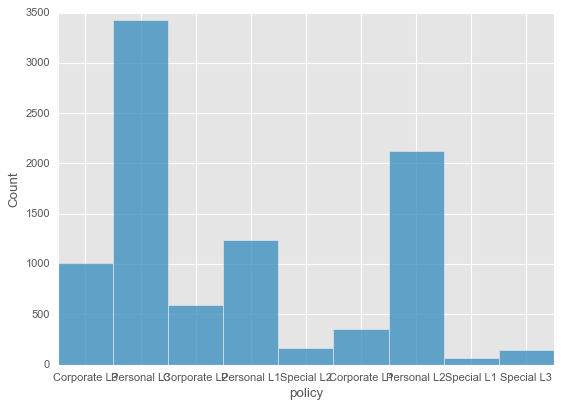

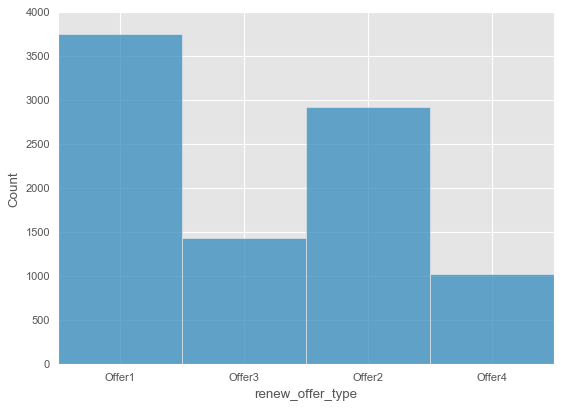

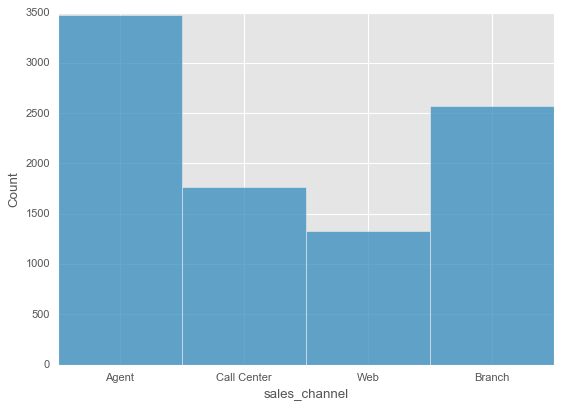

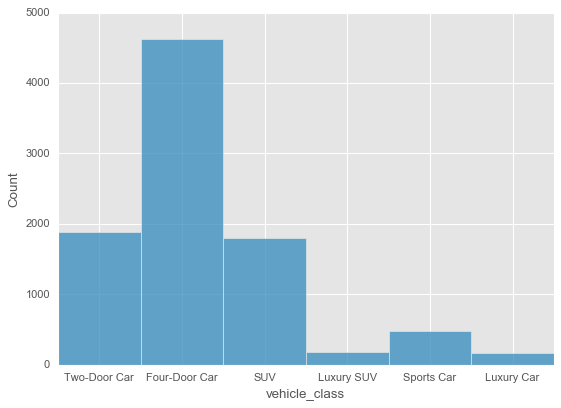

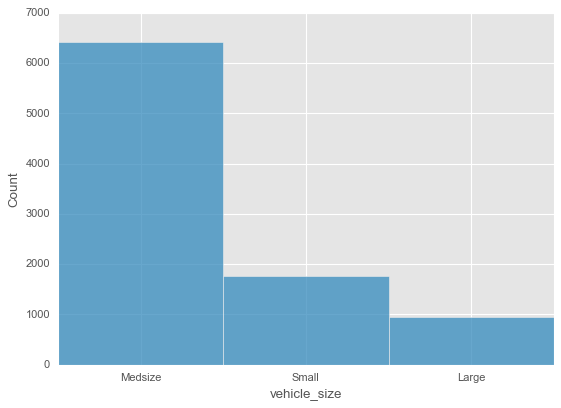

In [213]:
def hist (df):    
    plt.style.use('ggplot')    
    plt.xticks(rotation='vertical')
    for x in df.columns:
        sns.histplot(x = df[x])
        plt.show()
        
hist(discrete_df)

# nothing here seems abnormal to me. 

# We have a high NO Response rate in general
# Most customers seem to be from CA
# Most customers have a Basic Insurance 
# Most of the customers are employeed 
# Most of them are located in a suburban region
# Most customers insured there private car 
# Most customers have 1, 2 or 3 policies

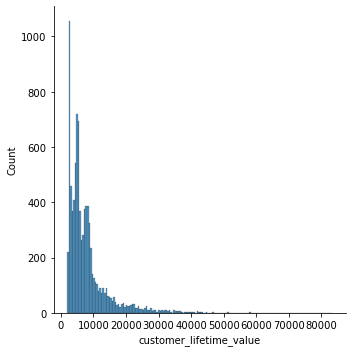

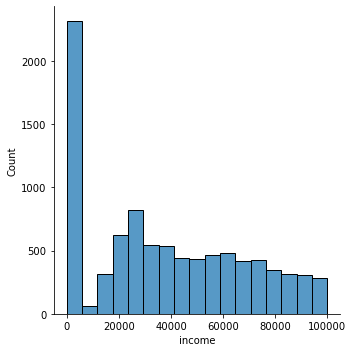

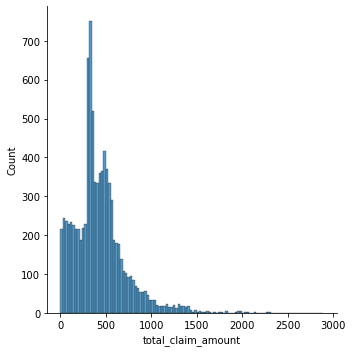

In [182]:
def continuous (df):
    for i in df:
        sns.displot(x = df[i])
        plt.show()
        
continuous(continuous_df)


# --> interestingly there are a lot of 0 income values

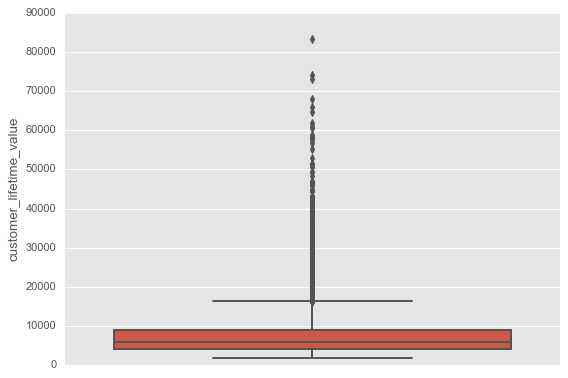

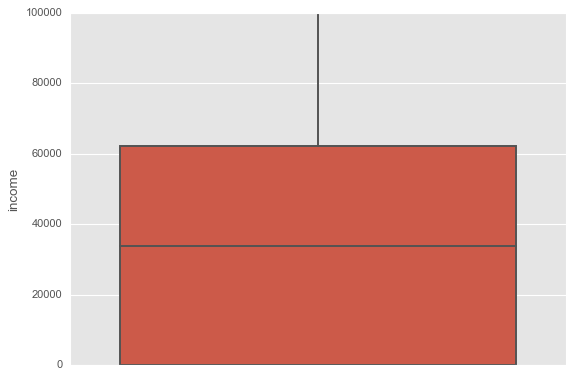

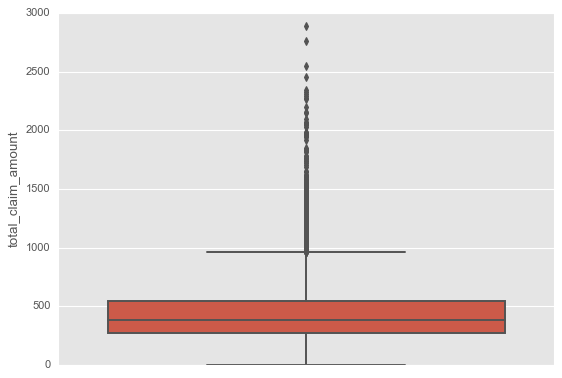

In [218]:
def box(x):
    for i in x: 
        sns.boxplot(y = x[i])
        plt.show()

box(continuous_df)

# customer_lifetime_value: Outlier above 80000. I will remove them from the df 
# i would not consider any other value as an outlier. Although we could argue that values above 2700 in total_claim_amount could be treated as an outlier. 

In [226]:
outlier = continuous_df[continuous_df['customer_lifetime_value'] > 80000]
outlier

continuous_df = continuous_df[continuous_df['customer_lifetime_value'] < 80000]

In [227]:
continuous_df.isna().sum()

customer_lifetime_value    0
income                     0
total_claim_amount         0
dtype: int64

In [228]:
discrete_df.isna().sum()

state                            0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
vehicle_class                    0
vehicle_size                     0
dtype: int64